In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
import cartopy
import cartopy.feature as feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Export GLM data to Model Prof. Alan Format

In [2]:
Ano = '2019'
Mes = '01'
Minuto = '15'

In [3]:
list_files = glob.glob('/mnt/Data/Data/GLM/SA/List/List_15min/'+Ano+'/'+Mes+'/*.csv')
list_files = sorted(list_files)
len_list = len(list_files)
print(list_files[0:8])

['/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_00_00_14.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_00_15_29.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_00_30_44.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_00_45_59.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_01_00_14.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_01_15_29.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_01_30_44.csv', '/mnt/Data/Data/GLM/SA/List/List_15min/2019/01/List_15min_2019_01_01_01_45_59.csv']


In [17]:
for t in range(12):#len_list

    filename_dir = list_files[t]

    name1 = filename_dir.split('/')[-1].replace('List_15min','raios')
    tmp = name1.split('_')[0:6]

    dia_s = tmp[3]
    hora_s = tmp[4]

    name_out = ''.join(tmp) + '.csv'

    print(f'{dia_s} {hora_s}:{minu_s}:{segu_s} - {name_out}')
    
    Total_list = pd.read_csv(filename_dir,delimiter=',')

    GLM_zero = np.array([])
    GLM_dos = np.array([])
    GLM_ano = np.array([]) 
    GLM_mes = np.array([]) 
    GLM_dia = np.array([]) 
    GLM_hora = np.array([])
    GLM_min = np.array([]) 
    GLM_seg = np.array([])
    GLM_nano = np.array([])
    GLM_lon = np.array([])
    GLM_lat = np.array([])

    for f in range(len(Total_list)):

        time_s = re.split("[/_]",Total_list['File'][f])[9][1:]

        # hour_s = time_s[7:9]
        minu_s = time_s[9:11]
        segu_s = time_s[11:13]

        # print(f'Time: {dia_s} {hour_s}:{minu_s}:{segu_s}')

        nc = Dataset('/media/arturo/Seagate Expansion Drive/'+Total_list['File'][f],mode = 'r')

        lat = nc['flash_lat']
        lon = nc['flash_lon']

        Col_zero = ['0'] * len(lat) 
        Col_dos = ['5'] * len(lat)
        Col_ano = [Ano] * len(lat)
        Col_mes = [Mes] * len(lat)
        Col_dia = [dia_s] * len(lat)
        Col_hora = [hora_s] * len(lat)
        Col_min = [minu_s] * len(lat)
        Col_seg = [segu_s] * len(lat)
        Col_nano = ['0'] * len(lat) 

        GLM_zero = np.concatenate(([GLM_zero,Col_zero]), axis=0)
        GLM_dos = np.concatenate(([GLM_dos,Col_dos]), axis=0)
        GLM_ano = np.concatenate(([GLM_ano,Col_ano]), axis=0)
        GLM_mes = np.concatenate(([GLM_mes,Col_mes]), axis=0)
        GLM_dia = np.concatenate(([GLM_dia,Col_dia]), axis=0)
        GLM_hora = np.concatenate(([GLM_hora,Col_hora]), axis=0)
        GLM_min = np.concatenate(([GLM_min,Col_min]), axis=0)
        GLM_seg = np.concatenate(([GLM_seg,Col_seg]), axis=0)
        GLM_nano = np.concatenate(([GLM_nano,Col_nano]), axis=0)
        GLM_lon = np.concatenate(([GLM_lon,lon]), axis=0)
        GLM_lat = np.concatenate(([GLM_lat,lat]), axis=0) 

        GLM_flash = pd.DataFrame({'1':GLM_zero,'2':GLM_ano,'3':GLM_mes.astype(int),
                                '4':GLM_dia.astype(int),'5':GLM_hora.astype(int),'6':GLM_min.astype(int),
                                '7':GLM_seg.astype(int),'8':GLM_nano,'9':np.round(GLM_lat,2),
                                '10':np.round(GLM_lon,2),'11':GLM_zero,'12':GLM_zero,'13':GLM_dos,
                                '14':GLM_zero,'15':GLM_zero,'16':GLM_zero,'17':GLM_zero,'18':GLM_zero,
                                '19':GLM_zero,'20':GLM_zero,'21':GLM_zero,'22':GLM_zero,
                                '23':GLM_zero,'24':GLM_zero,'25':GLM_zero})

    # Sao Paulo Brasildat
    #out1 = GLM_flash[(GLM_flash['10'] > -80) & (GLM_flash['10'] < -30 )]
    #out2 = out1[(out1['9'] > -40) & (out1['9'] < 10 )]

    # America do Sul
    out1 = GLM_flash[(GLM_flash['10'] > -85) & (GLM_flash['10'] < -30 )]
    out2 = out1[(out1['9'] > -45) & (out1['9'] < 10 )]

    salida = '/mnt/Data/Data/GLM/SA/Model_Alan_Format/' + name_out
    out2.to_csv(salida, index = None, header=False,sep='\t')

    # print()


01 00:59:40 - raios201901010000.csv
01 00:14:40 - raios201901010015.csv
01 00:29:40 - raios201901010030.csv
01 00:44:40 - raios201901010045.csv
01 01:59:40 - raios201901010100.csv
01 01:14:40 - raios201901010115.csv
01 01:29:40 - raios201901010130.csv
01 01:44:40 - raios201901010145.csv
01 02:59:40 - raios201901010200.csv
01 02:14:40 - raios201901010215.csv
01 02:29:40 - raios201901010230.csv
01 02:44:40 - raios201901010245.csv


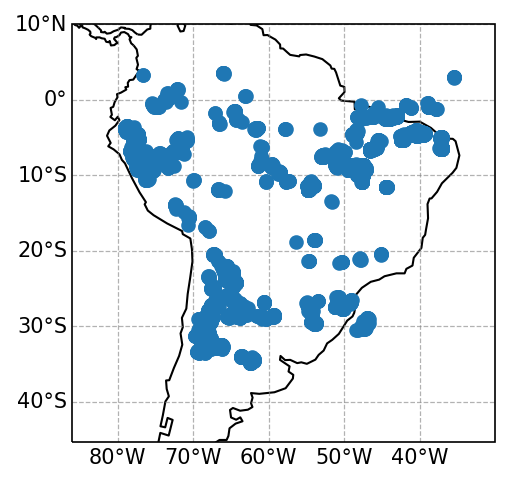

In [ ]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=150)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])

ax1.scatter(out2['10'],out2['9'],zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
